## Advanced Regression

Goal: To build a advanced regression model for a US based housing company.
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.



### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1172]:
# Reading the dataset
houses = pd.read_csv("train.csv")

In [1173]:
# Inspect the shape of the dataset
houses.shape

(1460, 81)

In [1174]:
# Inspect the different columsn in the dataset
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [1175]:
# Let's take a look at the first few rows
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1176]:
# Check the summary of the dataset
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1177]:
# Summary of the dataset: 
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Data Exploration
We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [1178]:
# All numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [1179]:
# dropping the columns we want to treat as categorical variables
houses_numeric = houses_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
houses_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


Let's now make a pairwise scatter plot and observe linear relationships.

In [1180]:
# Pairwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(houses_numeric)
#plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [1181]:
# Correlation matrix
cor = houses_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


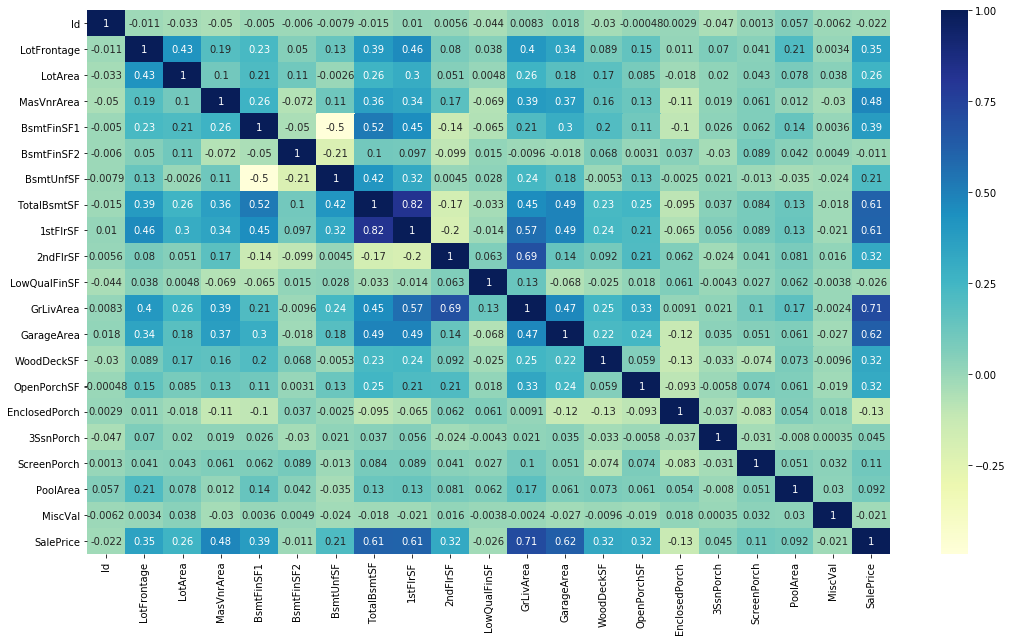

In [1182]:
# Figure size
plt.figure(figsize=(18,10))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

### Missing Values

In [1183]:
# Check the number of missing values in each column

houses.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1184]:
# Let's now check the percentage of missing values in each column

round(100*(houses.isnull().sum()/len(houses.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1185]:
##Repalcing NA values with meaningful values as NA means the facility is not present

#NA in Alley column means No Alley
houses['Alley'].fillna('No Alley', inplace=True)

houses['MasVnrType'].fillna('None', inplace=True) 

#NA in FireplaceQu column means No Fireplace
houses['FireplaceQu'].fillna('No Fireplace', inplace=True)

#NA in PoolQC column means No Pool
houses['PoolQC'].fillna('No Pool', inplace=True) 

#NA in Fence column means No Fence
houses['Fence'].fillna('No Fence', inplace=True) 

In [1186]:
houses['MasVnrArea'].fillna(0, inplace=True) 
houses['LotFrontage'].fillna(0, inplace=True) 

In [1187]:
houses['GarageType'].fillna('No Garage', inplace=True) 
houses['GarageFinish'].fillna('No Garage', inplace=True) 
houses['GarageQual'].fillna('No Garage', inplace=True) 
houses['GarageCond'].fillna('No Garage', inplace=True) 

As you can see that more than 90% values in `"MiscFeature"` is missing. Hence dropping the column.

In [1188]:
# Dropping "FireplaceQu" having 47% missing values
houses.drop(['MiscFeature'], axis = 1, inplace = True)

In [1189]:
# Get the value counts of all the columns

for column in houses:
    if round(100*(houses[column].astype('category').value_counts()/len(houses.index)), 2)[0] >90:
        print(houses[column].astype('category').value_counts())
        print('___________________________________________________')

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
___________________________________________________
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
___________________________________________________
0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
___________________________________________________
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
___________________________________________________
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
____________

Here we can see highly skewed features having only one values (Above 90%). Hence dropping the columns.

Taking into consideration that `"Utilities"` are main features for a House, retaining the feature.

In [1190]:
## Dropping highly skewed features
houses.drop(['LandSlope','LowQualFinSF', 'BsmtHalfBath', 
         'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1, inplace = True)

In [1191]:
# Check the number of null values again
houses.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [1192]:
# Fill the empty values with median values
houses= houses.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [1193]:
# Check the number of null values again
houses.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [1194]:
print(len(houses.index))
print(len(houses.index)/1460)

1460
1.0


In [1195]:
# Let's look at the dataset again

houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,No Pool,No Fence,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,No Pool,No Fence,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,No Pool,No Fence,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,No Pool,No Fence,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,No Pool,No Fence,12,2008,WD,Normal,250000


Now, clearly the variables `ID` won't be of any use in the analysis, so it's best that we drop this variable.

In [1196]:
houses.drop(['Id','MSZoning'], 1, inplace = True)

In [1197]:
houses.head(20)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,No Pool,No Fence,2,2008,WD,Normal,208500
1,20,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,No Pool,No Fence,5,2007,WD,Normal,181500
2,60,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,No Pool,No Fence,9,2008,WD,Normal,223500
3,70,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,No Pool,No Fence,2,2006,WD,Abnorml,140000
4,60,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,No Pool,No Fence,12,2008,WD,Normal,250000
5,50,85.0,14115,Pave,No Alley,IR1,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,1362,1,1,1,1,1,TA,5,Typ,0,No Fireplace,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,No Pool,MnPrv,10,2009,WD,Normal,143000
6,20,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,Inside,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,1694,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,No Pool,No Fence,8,2007,WD,Normal,307000
7,60,0.0,10382,Pave,No Alley,IR1,Lvl,AllPub,Corner,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,No Pool,No Fence,11,2009,WD,Normal,200000
8,50,51.0,6120,Pave,No Alley,Reg,Lvl,AllPub,Inside,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,1774,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,No Pool,No Fence,4,2008,WD,Abnorml,129900
9,190,50.0,7420,Pave,No Alley,Reg,Lvl,AllPub,Corner,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,1077,1,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,No Pool,No Fence,1,2008,WD,Normal,118000


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

Some of the features are ordinal type. Converting these features from "Int" to "Object" so that they can be treated as categorical variables.

In [1198]:
#converting from int type to object to treat the variables as categorical variables

houses['MSSubClass'] = houses['MSSubClass'].astype('object')
houses['OverallQual'] = houses['OverallQual'].astype('object')
houses['OverallCond'] = houses['OverallCond'].astype('object')
houses['BsmtFullBath'] = houses['BsmtFullBath'].astype('object')
#houses['BsmtHalfBath'] = houses['BsmtHalfBath'].astype('object')
houses['FullBath'] = houses['FullBath'].astype('object')
houses['HalfBath'] = houses['HalfBath'].astype('object')
houses['BedroomAbvGr'] = houses['BedroomAbvGr'].astype('object')
houses['KitchenAbvGr'] = houses['KitchenAbvGr'].astype('object')
houses['TotRmsAbvGrd'] = houses['TotRmsAbvGrd'].astype('object')
houses['Fireplaces'] = houses['Fireplaces'].astype('object')
houses['GarageCars'] = houses['GarageCars'].astype('object')

#### Creating dummy variables

In [1199]:
# subset all categorical variables
house_categorical = houses.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,Pave,No Alley,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,Pave,No Alley,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,Pave,No Alley,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,Pave,No Alley,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,Pave,No Alley,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [1200]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,

In [1201]:
# drop categorical variables 
houses = houses.drop(list(house_categorical.columns), axis=1)

In [1202]:
houses = pd.concat([houses, house_dummies], axis=1)

In [1203]:
houses.shape

(1460, 296)

We will create a new feature `"Age Of House"` to check how old the particular house is.

In [1204]:
CurrentDate = 2020

houses['Age of House'] = CurrentDate - houses['YearBuilt']
houses.drop(['YearBuilt'], 1, inplace = True)

houses['last remodeled age'] = CurrentDate - houses['YearRemodAdd']
houses.drop(['YearRemodAdd'], 1, inplace = True)

houses['Last deal of the house'] = CurrentDate - houses['YrSold']
houses.drop(['YrSold'], 1, inplace = True)

houses['Garage Age'] = CurrentDate - houses['GarageYrBlt']
houses.drop(['GarageYrBlt'], 1, inplace = True)

In [1205]:
houses.shape

(1460, 296)

In [1206]:
houses.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,G

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.


In [1207]:
# Put all the feature variables in X

X = houses.drop(['SalePrice'], 1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_

In [1208]:
# Put the target variable in y

y = houses['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

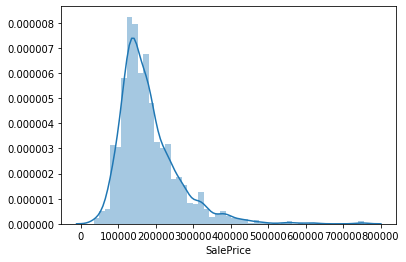

In [1209]:
# target variable: price of car
sns.distplot(houses['SalePrice'])
plt.show()

Sales price is skewed to a side. Hence taking log of sales price to normally distribute the data.

In [1210]:
y = np.log1p(y)

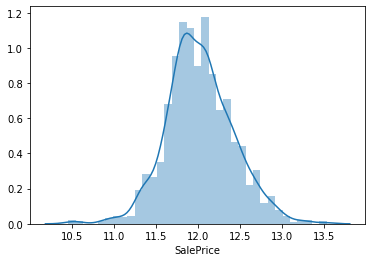

In [1211]:
# target variable: price of car
sns.distplot(y)
plt.show()

`"Sales Price"` is **normally distributed** over the data.

### Scaling

Lets scale the features.

In [1212]:
houses_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


All of the columns do not need to be scaled.Hence scaling particular columns.

In [1213]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF',
       '1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

# Scale these variables using 'fit_transform'
X[varlist] = scaler.fit_transform(X[varlist])

In [1214]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [1215]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Ridge Regression

In [1216]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1217]:
#checking the value of optimum number of parameters
print(model_cv.best_estimator_)
print(model_cv.best_params_)
print(model_cv.best_score_)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 10.0}
-0.09099760133017515


In [1218]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017993,0.003158,0.002599,7.997879e-04,0.0001,{'alpha': 0.0001},-0.093130,-0.099628,-0.098400,-0.100281,-0.095428,-0.097369,0.002700,25,-0.053116,-0.053999,-0.053083,-0.053150,-0.052666,-0.053203,0.000435
1,0.016595,0.004408,0.002200,4.007820e-04,0.001,{'alpha': 0.001},-0.093042,-0.099573,-0.098366,-0.100173,-0.095338,-0.097294,0.002705,24,-0.053138,-0.054004,-0.053085,-0.053160,-0.052678,-0.053213,0.000433
2,0.018394,0.003005,0.002400,4.906424e-04,0.01,{'alpha': 0.01},-0.092302,-0.099218,-0.098074,-0.099194,-0.094585,-0.096670,0.002768,23,-0.053353,-0.054066,-0.053120,-0.053266,-0.052808,-0.053322,0.000415
3,0.013196,0.001469,0.001999,5.519789e-07,0.05,{'alpha': 0.05},-0.090461,-0.098517,-0.097818,-0.096777,-0.092646,-0.095239,0.003142,22,-0.054303,-0.054292,-0.053477,-0.053936,-0.053580,-0.053918,0.000346
4,0.012198,0.000979,0.001798,7.501835e-04,0.1,{'alpha': 0.1},-0.089512,-0.098248,-0.097701,-0.095252,-0.091233,-0.094384,0.003476,20,-0.055408,-0.054528,-0.054153,-0.054871,-0.054678,-0.054728,0.000414
5,0.014996,0.004560,0.002198,3.994011e-04,0.2,{'alpha': 0.2},-0.088799,-0.097875,-0.097384,-0.094052,-0.090328,-0.093683,0.003649,19,-0.057297,-0.055064,-0.055417,-0.056672,-0.056655,-0.056221,0.000841
6,0.012797,0.000979,0.001800,4.000666e-04,0.3,{'alpha': 0.3},-0.088509,-0.097939,-0.097296,-0.093588,-0.090347,-0.093531,0.003715,16,-0.058778,-0.055591,-0.056403,-0.058186,-0.058259,-0.057443,0.001226
7,0.012196,0.001469,0.001799,3.998996e-04,0.4,{'alpha': 0.4},-0.088442,-0.097964,-0.097267,-0.093210,-0.090685,-0.093509,0.003682,14,-0.059965,-0.056077,-0.057208,-0.059423,-0.059506,-0.058436,0.001518
8,0.013995,0.003520,0.002399,1.356656e-03,0.5,{'alpha': 0.5},-0.088497,-0.097929,-0.097360,-0.093019,-0.090957,-0.093548,0.003641,17,-0.060964,-0.056524,-0.057876,-0.060410,-0.060498,-0.059254,0.001741
9,0.012197,0.000748,0.001799,4.004727e-04,0.6,{'alpha': 0.6},-0.088476,-0.097861,-0.097405,-0.092916,-0.091127,-0.093552,0.003620,18,-0.061841,-0.056918,-0.058461,-0.061215,-0.061362,-0.059960,0.001928


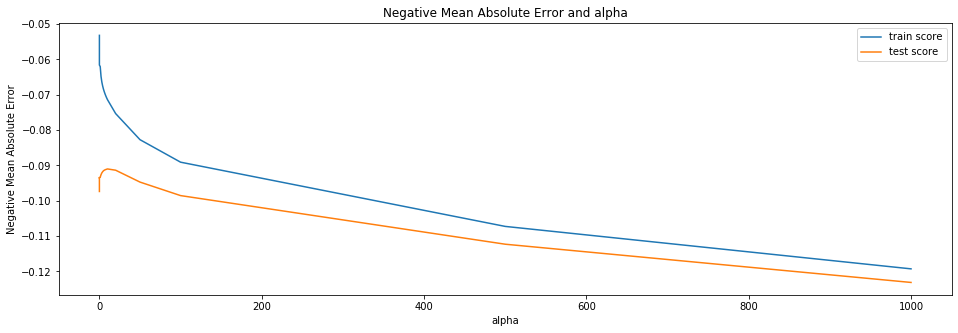

In [1219]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1220]:
print(model_cv.best_estimator_)
print(model_cv.best_params_)
print(model_cv.best_score_)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 10.0}
-0.09099760133017515


from the above graph and the bestparam score we got optimum lambda to be 10

In [1221]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.42093752e-03,  1.76343234e-02,  4.41846910e-04,  4.23757068e-05,
        1.01645006e-04,  5.02426872e-05,  4.42962394e-07,  3.02049556e-02,
        5.75582410e-02,  6.98609887e-02,  1.86062410e-02,  1.26623239e-02,
        1.11081552e-03,  5.48367375e-05,  2.46195894e-04, -1.44012444e-04,
       -6.39771416e-02, -1.40007164e-02,  7.61665588e-03,  1.12263192e-04,
       -4.35266964e-02,  4.28644968e-02,  2.08640055e-02, -2.72140664e-03,
        4.48829423e-03,  2.81754060e-03, -1.21441172e-02, -7.15559797e-02,
       -3.11192956e-02, -6.66885142e-03,  2.60484665e-02,  1.24845979e-03,
        3.39079768e-02,  1.77508068e-02, -3.70013379e-02,  6.62634059e-03,
        2.92951291e-02,  2.08515483e-02,  3.97205079e-02, -5.10532350e-03,
        3.65089430e-02, -3.21134642e-02, -9.31760297e-03, -8.26721393e-03,
       -6.54658896e-03, -2.82782050e-02,  2.24637652e-02,  5.41148723e-02,
       -7.57152660e-03,  9.91748430e-02, -7.01922043e-02, -1.61700217e-02,
       -8.73976796e-02, -

In [1222]:
#lets predict the R-squared value of test and train data
from sklearn import metrics

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9284283366222309


In [1223]:
type(ridge.coef_)

numpy.ndarray

In [1224]:
coeffs = np.squeeze (np.asarray(ridge.coef_))
print(coeffs)

[-7.42093752e-03  1.76343234e-02  4.41846910e-04  4.23757068e-05
  1.01645006e-04  5.02426872e-05  4.42962394e-07  3.02049556e-02
  5.75582410e-02  6.98609887e-02  1.86062410e-02  1.26623239e-02
  1.11081552e-03  5.48367375e-05  2.46195894e-04 -1.44012444e-04
 -6.39771416e-02 -1.40007164e-02  7.61665588e-03  1.12263192e-04
 -4.35266964e-02  4.28644968e-02  2.08640055e-02 -2.72140664e-03
  4.48829423e-03  2.81754060e-03 -1.21441172e-02 -7.15559797e-02
 -3.11192956e-02 -6.66885142e-03  2.60484665e-02  1.24845979e-03
  3.39079768e-02  1.77508068e-02 -3.70013379e-02  6.62634059e-03
  2.92951291e-02  2.08515483e-02  3.97205079e-02 -5.10532350e-03
  3.65089430e-02 -3.21134642e-02 -9.31760297e-03 -8.26721393e-03
 -6.54658896e-03 -2.82782050e-02  2.24637652e-02  5.41148723e-02
 -7.57152660e-03  9.91748430e-02 -7.01922043e-02 -1.61700217e-02
 -8.73976796e-02 -7.27234208e-02 -2.35333027e-02  1.29207932e-03
  3.07440745e-03 -6.62377377e-03  3.79522031e-02  7.56017597e-02
 -4.42872476e-02  2.13831

In [1225]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Age of House', 'last remodeled age', 'Last deal of the house', 'Garage Age'], dtype='object', length=295)

In [1226]:
ridge_features = pd.Series(coeffs, index = X_train.columns)
ridge_features.abs().sort_values(ascending=False)

OverallQual_9               1.305258e-01
PoolQC_Gd                   1.054284e-01
Neighborhood_Crawfor        9.917484e-02
OverallCond_3               9.623148e-02
Neighborhood_IDOTRR         8.739768e-02
Condition2_PosN             8.405540e-02
OverallQual_8               7.989408e-02
Neighborhood_NridgHt        7.560176e-02
CentralAir_Y                7.391186e-02
Neighborhood_MeadowV        7.272342e-02
MSSubClass_160              7.155598e-02
OverallQual_2               7.146012e-02
Neighborhood_Somerst        7.140460e-02
Fireplaces_3                7.019636e-02
Neighborhood_Edwards        7.019220e-02
Neighborhood_StoneBr        6.993853e-02
GrLivArea                   6.986099e-02
BldgType_Twnhs              6.879824e-02
OverallCond_9               6.660745e-02
TotRmsAbvGrd_10             6.511128e-02
Fireplaces_2                6.434899e-02
MSSubClass_30               6.397714e-02
PoolQC_No Pool              6.383069e-02
TotRmsAbvGrd_11             6.178406e-02
FullBath_3      

In [1227]:
alpha = 10

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(X_test)
final_predictions_ridge = np.exp(preds1)

In [1228]:
ridge_values = pd.DataFrame({'Id': y_test.index ,'SalePrice_actual': np.exp(y_test), 
                             'SalePrice_predicted':final_predictions_ridge })
ridge_values.head()

,Id,SalePrice_actual,SalePrice_predicted
1436,1436,120501.0,116527.342552
57,57,196501.0,185666.870749
780,780,176001.0,170293.824138
382,382,213501.0,196209.327908
1170,1170,171001.0,123212.635993


## Lasso

In [1229]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1230]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.289993,0.020321,0.001200,0.000400,0.0001,{'alpha': 0.0001},-0.083399,-0.092421,-0.089972,-0.084732,-0.078420,-0.085787,0.004950,1,-0.057225,-0.057165,-0.056052,-0.056827,-0.056876,-0.056829,0.000419
1,0.144593,0.068524,0.001599,0.000489,0.001,{'alpha': 0.001},-0.080261,-0.094445,-0.098256,-0.085921,-0.082812,-0.088331,0.006890,2,-0.076518,-0.072051,-0.071706,-0.074631,-0.076371,-0.074255,0.002054
2,0.017443,0.003019,0.001997,0.000629,0.01,{'alpha': 0.01},-0.106153,-0.124914,-0.126705,-0.111210,-0.118430,-0.117471,0.007864,3,-0.118516,-0.106761,-0.112276,-0.116291,-0.116504,-0.114070,0.004178
3,0.012596,0.000490,0.001799,0.000400,0.05,{'alpha': 0.05},-0.126692,-0.144069,-0.147559,-0.131757,-0.146142,-0.139231,0.008415,4,-0.142019,-0.128888,-0.135122,-0.140279,-0.141451,-0.137552,0.004971
4,0.013813,0.003742,0.002199,0.000400,0.1,{'alpha': 0.1},-0.153838,-0.168406,-0.175265,-0.156246,-0.170409,-0.164822,0.008338,5,-0.166318,-0.155318,-0.161372,-0.165886,-0.165479,-0.162875,0.004173


In [1231]:
#find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1232]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.268070,0.006474,0.002000,1.094408e-03,0.0001,{'alpha': 0.0001},0.907423,0.671676,0.832939,0.905448,0.921518,0.847859,0.093304,2,0.962133,0.960810,0.961129,0.961550,0.961097,0.961344,0.000460
1,0.143756,0.066892,0.001800,4.004724e-04,0.001,{'alpha': 0.001},0.909189,0.690067,0.824502,0.906164,0.920392,0.850121,0.086973,1,0.924443,0.932188,0.933239,0.926168,0.919647,0.927137,0.005041
2,0.016395,0.001020,0.001600,4.900573e-04,0.01,{'alpha': 0.01},0.862108,0.561623,0.744003,0.838556,0.842136,0.769776,0.111772,3,0.787064,0.839143,0.813246,0.794297,0.786866,0.804123,0.019975
3,0.015394,0.003874,0.002199,1.469244e-03,0.05,{'alpha': 0.05},0.808551,0.519883,0.700931,0.782963,0.774636,0.717482,0.105027,4,0.723819,0.790273,0.750747,0.731113,0.718680,0.742926,0.026059
4,0.012596,0.000491,0.001800,3.991870e-04,0.1,{'alpha': 0.1},0.735551,0.487217,0.630386,0.704435,0.703010,0.652202,0.089384,5,0.657107,0.720029,0.679442,0.662127,0.653897,0.674520,0.024402
5,0.012197,0.000980,0.001598,4.890485e-04,0.2,{'alpha': 0.2},0.642265,0.414033,0.538219,0.604852,0.619266,0.563804,0.082462,6,0.566581,0.615758,0.593049,0.576938,0.567964,0.584058,0.018444
6,0.012597,0.001497,0.002198,3.980182e-04,0.3,{'alpha': 0.3},0.641422,0.411593,0.537197,0.605009,0.617521,0.562626,0.083034,7,0.565416,0.614614,0.591277,0.575520,0.566719,0.582709,0.018427
7,0.012197,0.001166,0.001999,1.675050e-06,0.4,{'alpha': 0.4},0.640172,0.408729,0.535845,0.604388,0.615534,0.561011,0.083595,8,0.563865,0.613029,0.589741,0.573840,0.565134,0.581122,0.018433
8,0.010792,0.000397,0.002004,6.702234e-06,0.5,{'alpha': 0.5},0.638396,0.405394,0.534088,0.603202,0.613173,0.558929,0.084147,9,0.561870,0.610992,0.587765,0.571878,0.563095,0.579120,0.018425
9,0.011397,0.000489,0.001799,3.994966e-04,0.6,{'alpha': 0.6},0.636093,0.401594,0.531927,0.601506,0.610437,0.556390,0.084694,10,0.559432,0.608502,0.585351,0.569480,0.560603,0.576673,0.018415


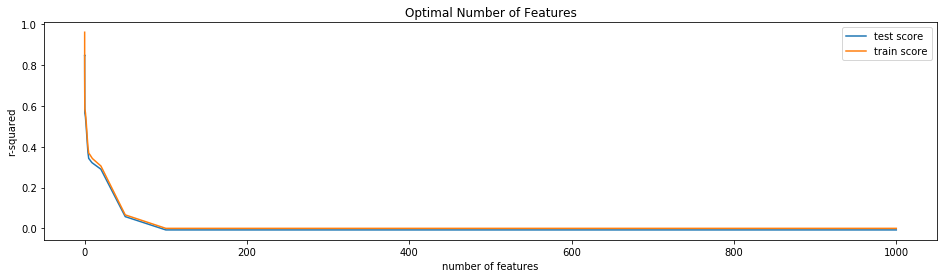

In [1233]:
# plotting CV results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [1234]:
#checking the value of optimum number of parameters
print(model_cv.best_estimator_)
print(model_cv.best_params_)
print(model_cv.best_score_)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0001}
-0.08578667542245423


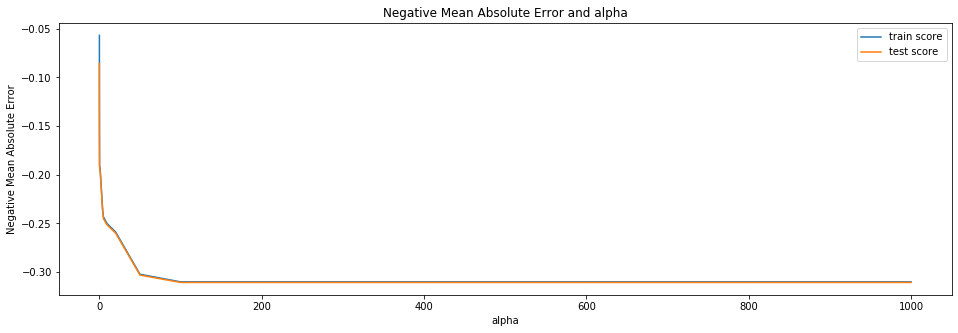

In [1235]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score,Lambda = 0.0001 is optimal value.

In [1236]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1237]:
#predicting the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9571213372486335


In [1238]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(X_test)
final_predictions_lasso = np.exp(preds)

In [1239]:
lasso.coef_

array([ 1.47430344e-03,  1.81828495e-02,  2.45366838e-03,  1.42433365e-04,
        1.55945774e-04,  9.34020357e-05,  0.00000000e+00,  6.04220783e-02,
        8.23539782e-02,  5.72674191e-02,  2.49634841e-02,  8.91484140e-03,
        5.13688944e-03,  3.05217095e-05,  1.69018974e-04, -8.80908102e-04,
       -6.08820435e-02, -4.95025636e-02, -0.00000000e+00, -3.49902313e-03,
       -3.27015814e-02,  1.48904835e-02,  2.37717260e-03, -0.00000000e+00,
       -0.00000000e+00, -2.40770053e-04, -2.65572146e-03, -1.01774584e-01,
       -1.07220317e-03, -8.74659714e-03,  7.50461038e-02,  0.00000000e+00,
        3.76233750e-02,  3.90743804e-03,  3.39150921e-03,  5.12600121e-03,
       -0.00000000e+00, -9.96767273e-03,  1.12033689e-02, -0.00000000e+00,
        2.90693968e-02, -2.96359225e-02, -0.00000000e+00, -9.88758675e-03,
       -0.00000000e+00, -3.89455498e-02,  2.86337344e-02,  7.82031277e-02,
       -0.00000000e+00,  1.28863308e-01, -4.32184481e-02,  0.00000000e+00,
       -8.80486270e-02, -

In [1240]:
coeffs1 = np.squeeze (np.asarray(lasso.coef_))
print(coeffs1)

[ 1.47430344e-03  1.81828495e-02  2.45366838e-03  1.42433365e-04
  1.55945774e-04  9.34020357e-05  0.00000000e+00  6.04220783e-02
  8.23539782e-02  5.72674191e-02  2.49634841e-02  8.91484140e-03
  5.13688944e-03  3.05217095e-05  1.69018974e-04 -8.80908102e-04
 -6.08820435e-02 -4.95025636e-02 -0.00000000e+00 -3.49902313e-03
 -3.27015814e-02  1.48904835e-02  2.37717260e-03 -0.00000000e+00
 -0.00000000e+00 -2.40770053e-04 -2.65572146e-03 -1.01774584e-01
 -1.07220317e-03 -8.74659714e-03  7.50461038e-02  0.00000000e+00
  3.76233750e-02  3.90743804e-03  3.39150921e-03  5.12600121e-03
 -0.00000000e+00 -9.96767273e-03  1.12033689e-02 -0.00000000e+00
  2.90693968e-02 -2.96359225e-02 -0.00000000e+00 -9.88758675e-03
 -0.00000000e+00 -3.89455498e-02  2.86337344e-02  7.82031277e-02
 -0.00000000e+00  1.28863308e-01 -4.32184481e-02  0.00000000e+00
 -8.80486270e-02 -1.89145538e-01 -2.38779771e-02  5.79238881e-03
  1.76598235e-02 -3.43075559e-03  2.83715793e-02  3.88515413e-02
 -3.69201118e-02  5.34180

In [1241]:
lasso_features = pd.Series(coeffs1, index = X_train.columns)
lasso_features.abs().sort_values(ascending=False)

PoolQC_Gd                   2.538906
Condition2_PosN             1.391778
OverallQual_2               0.338979
Functional_Sev              0.211065
BsmtFullBath_3              0.198986
OverallQual_9               0.197138
Neighborhood_MeadowV        0.189146
OverallCond_9               0.174604
SaleType_ConLD              0.166083
OverallQual_10              0.147663
OverallCond_3               0.145365
Neighborhood_Crawfor        0.128863
MSSubClass_160              0.101775
Neighborhood_StoneBr        0.101479
TotRmsAbvGrd_11             0.099704
OverallQual_8               0.099645
OverallCond_8               0.094088
BsmtFullBath_2              0.088227
Neighborhood_IDOTRR         0.088049
KitchenAbvGr_1              0.085434
ExterQual_Fa                0.085033
OverallCond_7               0.083359
Functional_Typ              0.083215
2ndFlrSF                    0.082354
Exterior1st_BrkComm         0.081760
Neighborhood_ClearCr        0.078203
Exterior1st_BrkFace         0.076825
S

In [1242]:
lasso_values = pd.DataFrame({'Id': y_test.index ,'SalePrice_actual': np.exp(y_test), 
                             'SalePrice_predicted':final_predictions_lasso })
lasso_values.head(8)

,Id,SalePrice_actual,SalePrice_predicted
1436,1436,120501.0,118006.495097
57,57,196501.0,190223.738327
780,780,176001.0,164487.558475
382,382,213501.0,198591.466007
1170,1170,171001.0,11362.041618
726,726,222001.0,261132.824541
258,258,231501.0,222796.596905
888,888,268001.0,298100.599920


## Subjective Question:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1243]:
lasso_features.sort_values(ascending=False)

BsmtFullBath_3              0.198986
OverallQual_9               0.197138
OverallCond_9               0.174604
SaleType_ConLD              0.166083
OverallQual_10              0.147663
Neighborhood_Crawfor        0.128863
Neighborhood_StoneBr        0.101479
OverallQual_8               0.099645
OverallCond_8               0.094088
BsmtFullBath_2              0.088227
KitchenAbvGr_1              0.085434
OverallCond_7               0.083359
Functional_Typ              0.083215
2ndFlrSF                    0.082354
Neighborhood_ClearCr        0.078203
Exterior1st_BrkFace         0.076825
Street_Pave                 0.075046
Neighborhood_Somerst        0.073278
SaleCondition_Partial       0.066284
GarageCars_4                0.064193
SaleCondition_Normal        0.064058
GarageQual_Gd               0.063724
CentralAir_Y                0.062940
Condition1_Norm             0.061889
1stFlrSF                    0.060422
Condition2_PosA             0.059415
GrLivArea                   0.057267
N

The top 5 Features having **POSITIVE** effect on the prediction values are:

As per the situation we are not getting these 5 features.

Hence,we need to build another model where these features are not present in model building.

Firstly we need to drop these features from training and testing dataset.

In [1244]:
X_train.drop(['BsmtFullBath_3','OverallQual_9','OverallQual_10','SaleType_ConLD','OverallCond_9'], 1, inplace = True)

In [1245]:
X_test.drop(['BsmtFullBath_3','OverallQual_9','OverallQual_10','SaleType_ConLD','OverallCond_9'], 1, inplace = True)

#### Rebuilding the lasso model

In [1246]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1247]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.268998,0.067936,0.001799,4.000941e-04,0.0001,{'alpha': 0.0001},-0.085185,-0.093845,-0.090123,-0.087524,-0.077974,-0.086929,0.005320,1,-0.058018,-0.058342,-0.057630,-0.057564,-0.058222,-0.057955,0.000311
1,0.170777,0.059036,0.001599,4.902521e-04,0.001,{'alpha': 0.001},-0.081487,-0.096871,-0.099556,-0.088504,-0.087243,-0.090723,0.006608,2,-0.077426,-0.073564,-0.072705,-0.075219,-0.077659,-0.075315,0.001992
2,0.017393,0.002415,0.001800,3.991128e-04,0.01,{'alpha': 0.01},-0.106153,-0.124914,-0.126705,-0.111210,-0.118430,-0.117471,0.007864,3,-0.118516,-0.106761,-0.112276,-0.116291,-0.116504,-0.114070,0.004178
3,0.011996,0.000632,0.002000,5.091228e-07,0.05,{'alpha': 0.05},-0.126692,-0.144069,-0.147559,-0.131757,-0.146142,-0.139231,0.008415,4,-0.142019,-0.128888,-0.135122,-0.140279,-0.141451,-0.137552,0.004971
4,0.012196,0.001166,0.002000,1.007019e-06,0.1,{'alpha': 0.1},-0.153838,-0.168406,-0.175265,-0.156246,-0.170409,-0.164822,0.008338,5,-0.166318,-0.155318,-0.161372,-0.165886,-0.165479,-0.162875,0.004173


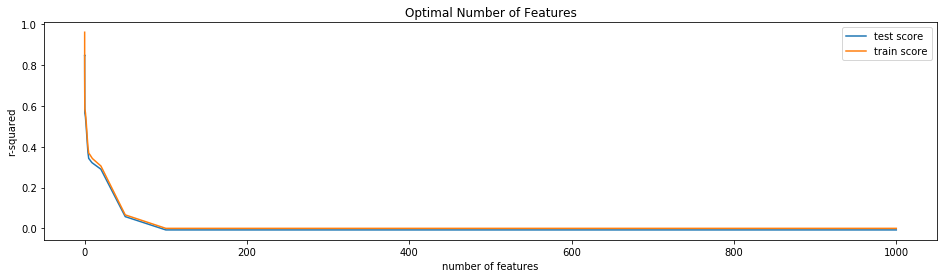

In [1248]:
# plotting CV results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [1249]:
#checking the value of optimum number of parameters
print(model_cv.best_estimator_)
print(model_cv.best_params_)
print(model_cv.best_score_)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0001}
-0.08692857577526723


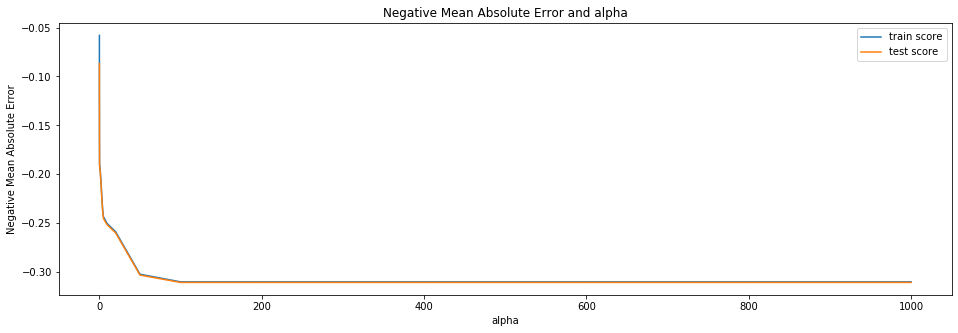

In [1250]:
# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1251]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1252]:
#predicting the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9553716637082779


In [1253]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(X_test)
final_predictions_lasso = np.exp(preds)

In [1254]:
lasso.coef_

array([ 8.02056079e-04,  1.82699591e-02,  3.13718064e-03,  1.41372337e-04,
        1.50310286e-04,  9.02207108e-05,  0.00000000e+00,  6.68476226e-02,
        8.67091851e-02,  4.72667638e-02,  2.57664314e-02,  9.92931963e-03,
        5.04218866e-03,  2.01938132e-05,  1.71308079e-04, -7.45208997e-04,
       -6.16547086e-02, -4.82235175e-02, -0.00000000e+00, -0.00000000e+00,
       -2.96155867e-02,  1.87720427e-02,  5.76146170e-03, -4.70015301e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -9.70356941e-02,
       -1.47532209e-04,  0.00000000e+00,  9.72884087e-02,  9.41811566e-03,
        4.29085903e-02,  2.88542610e-03,  3.71352871e-04,  3.65600919e-03,
        0.00000000e+00, -7.37574791e-03,  1.21361082e-02, -0.00000000e+00,
        2.79783409e-02, -3.26833527e-02, -0.00000000e+00, -1.01431047e-02,
       -0.00000000e+00, -3.93185234e-02,  2.91609515e-02,  7.58677993e-02,
       -0.00000000e+00,  1.32274370e-01, -3.29710735e-02,  6.91844635e-04,
       -8.48134590e-02, -

In [1255]:
coeffs2 = np.squeeze (np.asarray(lasso.coef_))
print(coeffs2)

[ 8.02056079e-04  1.82699591e-02  3.13718064e-03  1.41372337e-04
  1.50310286e-04  9.02207108e-05  0.00000000e+00  6.68476226e-02
  8.67091851e-02  4.72667638e-02  2.57664314e-02  9.92931963e-03
  5.04218866e-03  2.01938132e-05  1.71308079e-04 -7.45208997e-04
 -6.16547086e-02 -4.82235175e-02 -0.00000000e+00 -0.00000000e+00
 -2.96155867e-02  1.87720427e-02  5.76146170e-03 -4.70015301e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -9.70356941e-02
 -1.47532209e-04  0.00000000e+00  9.72884087e-02  9.41811566e-03
  4.29085903e-02  2.88542610e-03  3.71352871e-04  3.65600919e-03
  0.00000000e+00 -7.37574791e-03  1.21361082e-02 -0.00000000e+00
  2.79783409e-02 -3.26833527e-02 -0.00000000e+00 -1.01431047e-02
 -0.00000000e+00 -3.93185234e-02  2.91609515e-02  7.58677993e-02
 -0.00000000e+00  1.32274370e-01 -3.29710735e-02  6.91844635e-04
 -8.48134590e-02 -1.87864357e-01 -2.33448588e-02  7.94085277e-03
  1.69064826e-02 -3.26556842e-03  2.67324422e-02  4.97607472e-02
 -2.86600433e-02  6.03674

In [1256]:
lasso_features = pd.Series(coeffs2, index = X_train.columns)
lasso_features.sort_values(ascending=False)

Neighborhood_Crawfor        0.132274
Condition2_PosA             0.129827
Neighborhood_StoneBr        0.099100
Street_Pave                 0.097288
KitchenAbvGr_1              0.092950
2ndFlrSF                    0.086709
Functional_Typ              0.082797
BsmtFullBath_2              0.082685
Exterior1st_BrkFace         0.077937
Neighborhood_Somerst        0.077017
Neighborhood_ClearCr        0.075868
1stFlrSF                    0.066848
SaleCondition_Normal        0.065372
Condition1_Norm             0.062057
Neighborhood_SWISU          0.060367
CentralAir_Y                0.059990
GarageQual_Gd               0.059821
SaleCondition_Partial       0.057141
GarageCars_4                0.057007
Condition1_RRNn             0.053757
Electrical_FuseF            0.051612
BsmtExposure_Gd             0.051548
Neighborhood_NridgHt        0.049761
GrLivArea                   0.047267
FullBath_3                  0.044311
SaleType_CWD                0.043771
SaleType_New                0.043614
A

In [1257]:
lasso_values = pd.DataFrame({'Id': y_test.index ,'SalePrice_actual': np.exp(y_test), 
                             'SalePrice_predicted':final_predictions_lasso })
lasso_values.head(8)

,Id,SalePrice_actual,SalePrice_predicted
1436,1436,120501.0,116760.109691
57,57,196501.0,190271.508583
780,780,176001.0,165688.204705
382,382,213501.0,198499.686367
1170,1170,171001.0,11439.299841
726,726,222001.0,245148.389440
258,258,231501.0,223154.496937
888,888,268001.0,297810.505696
